# Import Dependencies

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from config import student_dict

# Set Paths

In [2]:
cwd= os.getcwd()

plot_path= os.path.join(cwd,"plots")

# Read CSVs

In [3]:
self_df= pd.read_csv("self_survey.csv")
literacy_df= pd.read_csv("literacy_survey.csv")
elementary_df= pd.read_csv("elementary_survey.csv")

# Survey Categories
The researcher consolidated their questions into 4 categories.

In [4]:
self_categories= {
    "presentation": ["q_1","q_2","q_3","q_6","q_9"],
    "sharing": ["q_5","q_10","q_11"],
    "confidence": ["q_4","q_13","q_14","q_15"],
    "risk": ["q_7","q_8","q_12"]
}

literacy_categories= {
    "presentation": ["q_1","q_2","q_3","q_6","q_9"],
    "sharing": ["q_5","q_10","q_11"],
    "confidence": ["q_4","q_13","q_14","q_15"],
    "risk": ["q_7","q_8","q_12"]
}

elementary_categories= {
    "presentation": ["q_1","q_2","q_3","q_6","q_9"],
    "sharing": ["q_5","q_10","q_11"],
    "confidence": ["q_4","q_14"],
    "risk": ["q_7","q_8","q_12"]
}

# Housekeeping

## Remove Spaces in 'student' field

In [5]:
self_df["student"].replace([" ",chr(32)],"", regex= True, inplace= True)
literacy_df["student"].replace([" ",chr(32)],"", regex= True, inplace= True)
elementary_df["student"].replace([" ",chr(32)],"", regex= True, inplace= True)

## Rename Students
Need to anonymize the student data

In [6]:
self_df["student"].replace(student_dict, inplace= True)
literacy_df["student"].replace(student_dict, inplace= True)
elementary_df["student"].replace(student_dict, inplace= True)

In [7]:
elementary_df.head()

,student,surveyor,survey_stage,q_1,q_2,q_3,q_4,q_5,q_6,q_7,q_8,q_9,q_10,q_11,q_12,q_14
0,Student 1,elementary,Pre,9,9,8,1,0,9,7,7,10,0,0,9,7
1,Student 1,elementary,Post,6,8,5,7,6,5,7,8,5,7,5,7,8
2,Student 2,elementary,Pre,7,7,7,7,7,7,7,7,7,7,7,7,7
3,Student 2,elementary,Post,10,9,5,7,7,9,9,8,9,8,8,8,9
4,Student 3,elementary,Pre,4,5,5,5,6,5,5,5,6,5,5,6,5


# Create DF's reflecting mean scores for each skill category

In [8]:
mean_df= self_df.loc[self_df["student"] == "Student_2", self_categories["presentation"]].mean(axis= 1)
mean_df.reset_index()

,index,0


In [9]:
def pre_post_scores_list(df, categories_dict):
    pre_score_dict={
        "presentation": [],
        "sharing": [],
        "confidence": [],
        "risk": []
    }

    post_score_dict={
        "presentation": [],
        "sharing": [],
        "confidence": [],
        "risk": []
    }

    for student in df["student"].unique():
        for key in list(categories_dict.keys()):
            mean_df= df.loc[df["student"] == student, categories_dict[key]].mean(axis= 1)
            pre_score_dict[key].append(mean_df.iloc[0])
            post_score_dict[key].append(mean_df.iloc[1])
    
    return (pre_score_dict, post_score_dict)

# Plot

## Pre- to Post-Scores

In [10]:
color_dict= {
    "presentation": "#433269",
    "sharing": "#36abad",
    "confidence": "#e07c24",
    "risk": "#468705"
}

font_dict= {
    'loc': "left",
    'fontname': "Times New Roman",
    'y': 1.05
}

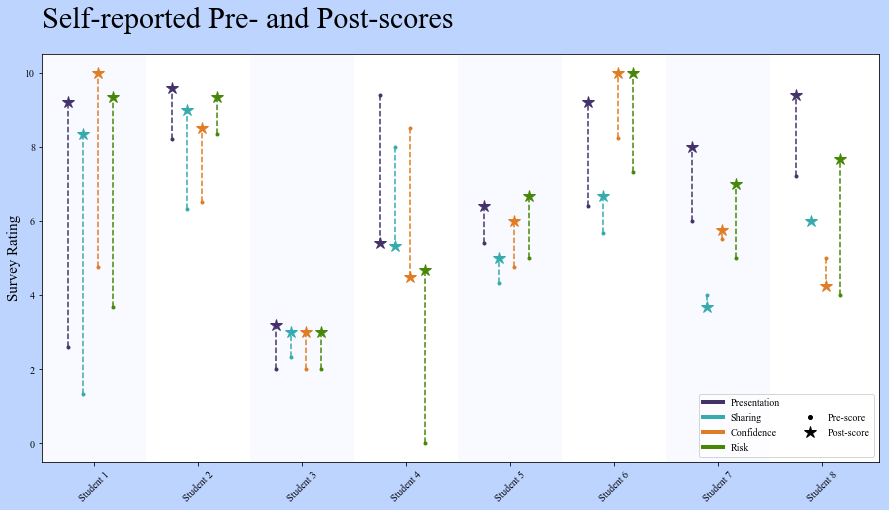

In [11]:
self_pre_score_dict, self_post_score_dict= pre_post_scores_list(self_df, self_categories)

fig, ax= plt.subplots(figsize= (15,7.5))

x_offset= 0

ax.set_xlim(-0.25,7.8)
ax.set_ylim(-0.5,10.5)

for key in self_categories.keys():
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        self_pre_score_dict[key],
        linewidth= 0,
        marker=".",
        color= color_dict[key]
    )
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        self_post_score_dict[key],
        linewidth= 0,
        marker="*",
        markersize= 12,
        color= color_dict[key]
    )
    for i in range(0,8):
        ax.axvline(
            i+x_offset,
            (self_pre_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            (self_post_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            color= color_dict[key],
            linestyle="--"
        )
    x_offset+= (1/7)
    
for i in range(0,8):
    if i % 2 == 0:
        plt.axvspan(i-.25,i+.75,facecolor= '#bdd4ff', alpha= .1)
    
ax.set_xticks(np.arange(0.25,8.25))
xticklabels= self_df["student"].unique()
ax.set_xticklabels(xticklabels, rotation= 45, name= font_dict["fontname"])

for label in ax.get_yticklabels():
    label.set_fontproperties(font_dict['fontname'])

ax.set_ylabel("Survey Rating", fontsize= 15, name= font_dict["fontname"])

ax.set_title(
    "Self-reported Pre- and Post-scores",
    fontsize= 30,
    loc= font_dict["loc"],
    name= font_dict["fontname"],
    y= font_dict['y']
)

legend_lines= [
    Line2D([0],[0], color= color_dict["presentation"], lw= 4, label= "Presentation"),
    Line2D([0],[0], color= color_dict["sharing"], lw= 4, label= "Sharing"),
    Line2D([0],[0], color= color_dict["confidence"], lw= 4, label= "Confidence"),
    Line2D([0],[0], color= color_dict["risk"], lw= 4, label= "Risk"),
    Line2D([0],[0], color= 'w', lw= 0, label= ""),
    Line2D([0],[0], marker= ".", markersize= 8, color= 'k', lw= 0, label= "Pre-score"),
    Line2D([0],[0], marker= "*", markersize= 12, color= 'k', lw= 0, label= "Post-score"),
]

legend= ax.legend(handles= legend_lines, ncol= 2)
plt.setp(legend.texts, family= "Times New Roman")

fig.patch.set_facecolor('#bdd4ff')

fig.savefig(os.path.join(plot_path,"self_pre_to_post_scores.png"), facecolor= fig.get_facecolor())

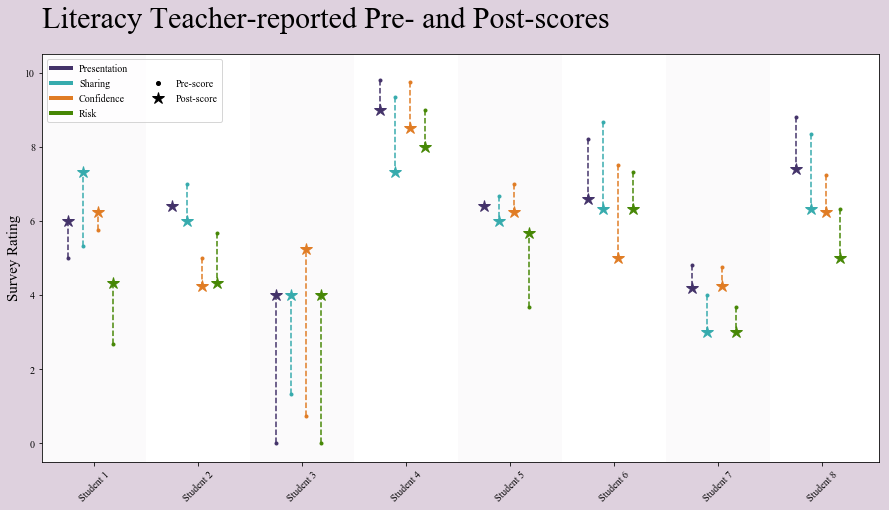

In [12]:
literacy_pre_score_dict, literacy_post_score_dict= pre_post_scores_list(literacy_df, literacy_categories)

fig, ax= plt.subplots(figsize= (15,7.5))

x_offset= 0

ax.set_xlim(-0.25,7.8)
ax.set_ylim(-0.5,10.5)

for key in literacy_categories.keys():
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        literacy_pre_score_dict[key],
        linewidth= 0,
        marker=".",
        color= color_dict[key]
    )
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        literacy_post_score_dict[key],
        linewidth= 0,
        marker="*",
        markersize= 12,
        color= color_dict[key]
    )
    for i in range(0,8):
        ax.axvline(
            i+x_offset,
            (literacy_pre_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            (literacy_post_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            color= color_dict[key],
            linestyle="--"
        )
    x_offset+= (1/7)
    
for i in range(0,8):
    if i % 2 == 0:
        plt.axvspan(i-.25,i+.75,facecolor= '#ded1de', alpha= .1)
    
ax.set_xticks(np.arange(0.25,8.25))
xticklabels= self_df["student"].unique()
ax.set_xticklabels(xticklabels, rotation= 45, name= font_dict["fontname"])

for label in ax.get_yticklabels():
    label.set_fontproperties(font_dict['fontname'])

ax.set_ylabel("Survey Rating", fontsize= 15, name= font_dict["fontname"])

ax.set_title(
    "Literacy Teacher-reported Pre- and Post-scores",
    fontsize= 30,
    loc= font_dict["loc"],
    name= font_dict["fontname"],
    y= font_dict['y']
)

legend_lines= [
    Line2D([0],[0], color= color_dict["presentation"], lw= 4, label= "Presentation"),
    Line2D([0],[0], color= color_dict["sharing"], lw= 4, label= "Sharing"),
    Line2D([0],[0], color= color_dict["confidence"], lw= 4, label= "Confidence"),
    Line2D([0],[0], color= color_dict["risk"], lw= 4, label= "Risk"),
    Line2D([0],[0], color= 'w', lw= 0, label= ""),
    Line2D([0],[0], marker= ".", markersize= 8, color= 'k', lw= 0, label= "Pre-score"),
    Line2D([0],[0], marker= "*", markersize= 12, color= 'k', lw= 0, label= "Post-score"),
]

legend= ax.legend(handles= legend_lines, ncol= 2)
plt.setp(legend.texts, family= "Times New Roman")

fig.patch.set_facecolor('#ded1de')

fig.savefig(os.path.join(plot_path,"lit_pre_to_post_scores.png"), facecolor= fig.get_facecolor())

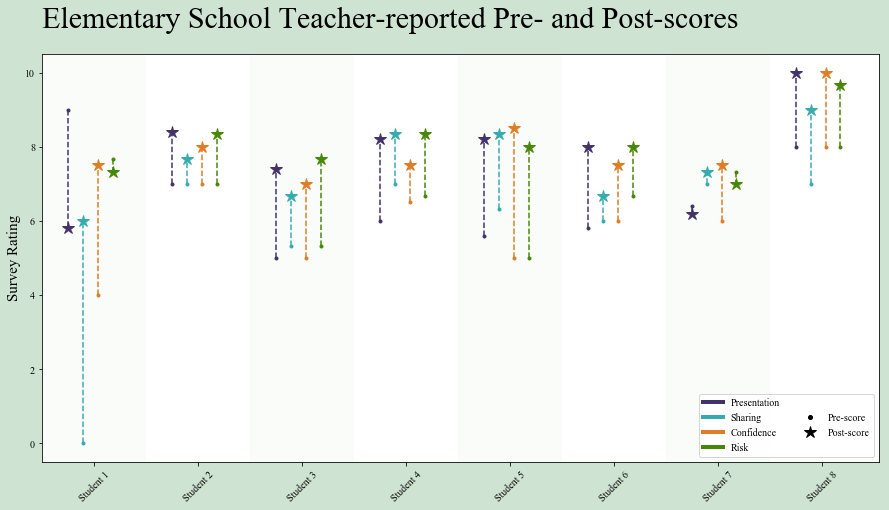

In [13]:
elementary_pre_score_dict, elementary_post_score_dict= pre_post_scores_list(elementary_df, elementary_categories)

fig, ax= plt.subplots(figsize= (15,7.5))

x_offset= 0

ax.set_xlim(-0.25,7.8)
ax.set_ylim(-0.5,10.5)

for key in elementary_categories.keys():
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        elementary_pre_score_dict[key],
        linewidth= 0,
        marker=".",
        color= color_dict[key]
    )
    ax.plot(
        np.arange(0+x_offset,8+x_offset),
        elementary_post_score_dict[key],
        linewidth= 0,
        marker="*",
        markersize= 12,
        color= color_dict[key]
    )
    for i in range(0,8):
        ax.axvline(
            i+x_offset,
            (elementary_pre_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            (elementary_post_score_dict[key][i] - (-0.5))/(10.5 - (-0.5)),
            color= color_dict[key],
            linestyle="--"
        )
    x_offset+= (1/7)
    
for i in range(0,8):
    if i % 2 == 0:
        plt.axvspan(i-.25,i+.75,facecolor= '#cfe3d3', alpha= .1)
    
ax.set_xticks(np.arange(0.25,8.25))
xticklabels= self_df["student"].unique()
ax.set_xticklabels(xticklabels, rotation= 45, name= font_dict["fontname"])

for label in ax.get_yticklabels():
    label.set_fontproperties(font_dict['fontname'])

ax.set_ylabel("Survey Rating", fontsize= 15, name= font_dict["fontname"])

ax.set_title(
    "Elementary School Teacher-reported Pre- and Post-scores",
    fontsize= 30,
    loc= font_dict["loc"],
    name= font_dict["fontname"],
    y= font_dict['y']
)

legend_lines= [
    Line2D([0],[0], color= color_dict["presentation"], lw= 4, label= "Presentation"),
    Line2D([0],[0], color= color_dict["sharing"], lw= 4, label= "Sharing"),
    Line2D([0],[0], color= color_dict["confidence"], lw= 4, label= "Confidence"),
    Line2D([0],[0], color= color_dict["risk"], lw= 4, label= "Risk"),
    Line2D([0],[0], color= 'w', lw= 0, label= ""),
    Line2D([0],[0], marker= ".", markersize= 8, color= 'k', lw= 0, label= "Pre-score"),
    Line2D([0],[0], marker= "*", markersize= 12, color= 'k', lw= 0, label= "Post-score"),
]

legend= ax.legend(handles= legend_lines, ncol= 2)
plt.setp(legend.texts, family= "Times New Roman")

fig.patch.set_facecolor('#cfe3d3')

fig.savefig(os.path.join(plot_path,"elem_pre_to_post_scores.png"), facecolor= fig.get_facecolor())